## Observations and Insights 

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
total_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
total_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [48]:
#giving columns no spaces 
total_data.rename(columns={'Mouse ID':'Mouse_ID',
                           'Drug Regimen':'Drug_Regimen', 
                           'Weight (g)':'Weight(g)', 
                           'Tumor Volume (mm3)': 'Tumor_Volume(mm3)', 
                           'Metastatic Sites':'Metastatic_Sites'},
                            inplace = True)
total_data.head()

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight(g),Timepoint,Tumor_Volume(mm3),Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [49]:
# Checking the number of mice.
print(len(total_data.Mouse_ID.unique()))

249


In [50]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [51]:
# Optional: Get all the data for the duplicate mouse ID. 


In [52]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
total_data.drop_duplicates(["Mouse_ID", "Timepoint"], inplace = True)


In [53]:
# Checking the number of mice in the clean DataFrame.
print(len(total_data.Mouse_ID.unique()))

249


## Summary Statistics

In [54]:
total_data.head()

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight(g),Timepoint,Tumor_Volume(mm3),Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_groupby = total_data.groupby("Drug_Regimen")
summary_drug_stats = pd.DataFrame()
summary_drug_stats["Mean"] = regimen_groupby["Tumor_Volume(mm3)"].mean()
summary_drug_stats["Median"] = regimen_groupby["Tumor_Volume(mm3)"].median()
summary_drug_stats["Variance"] = regimen_groupby["Tumor_Volume(mm3)"].var()
summary_drug_stats["Standard_Deviation"] = regimen_groupby["Tumor_Volume(mm3)"].std()
summary_drug_stats["SEM"] = regimen_groupby["Tumor_Volume(mm3)"].sem()

summary_drug_stats

,Mean,Median,Variance,Standard_Deviation,SEM
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [79]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_drug_stats_agg = regimen_groupby["Tumor_Volume(mm3)"].agg([
                    'mean', 'median', 'var', 'std','sem'])

summary_drug_stats_agg.rename(columns={
                        'mean':'Mean',
                        'median': 'Median',
                        'var': 'Variance',
                        'std': 'Standard_Deviation',
                        'sem':'SEM'}, inplace = True)

summary_drug_stats_agg

,Mean,Median,Variance,Standard_Deviation,SEM
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

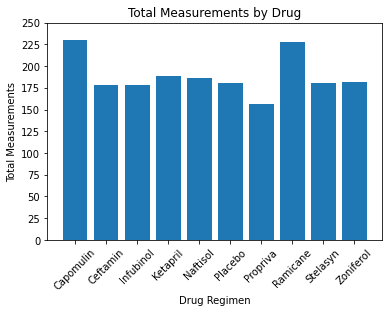

In [111]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
x_axis = summary_drug_stats.index
y_axis = regimen_groupby.Mouse_ID.count()
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements")
plt.title("Total Measurements by Drug")
plt.xticks(rotation=45)
plt.yticks(range(0, 275, 25))
plt.ylim(0,250)
plt.bar(x_axis, y_axis)
plt.show()

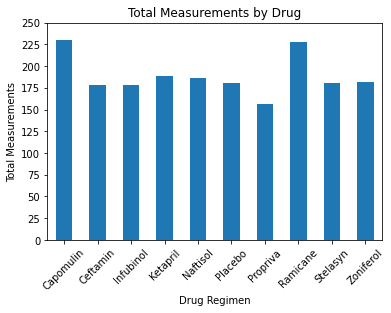

In [109]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
bar_plot = pd.DataFrame({"Drug Regimen":x_axis, "Total Measurements":y_axis})

bar_plot.plot(x = "Drug Regimen",
            y = "Total Measurements",
            kind = "bar",
            title = "Total Measurements by Drug", 
            legend = False,
            yticks = range(0, 275, 25),
            xlabel = "Drug Regimen",
            ylabel = "Total Measurements",
            rot=45
             )
plt.show()


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
